In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras  import layers, models
from tensorflow.keras.utils import to_categorical
import plotly.express as px
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize the images to [0, 1] range
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("Unique labels:", np.unique(y_train))

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [5]:
x_train_flat = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0

In [6]:
# check count per class
(unique, counts) = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Samples available per class:", class_counts)


Samples available per class: {np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}


In [7]:
samples_per_class = 100

# Get balanced samples
x_samples = []
y_samples = []

for digit in range(10):
    idxs = np.where(y_train == digit)[0]
    chosen = np.random.choice(idxs, samples_per_class, replace=False)
    x_samples.append(x_train_flat[chosen])
    y_samples.append(y_train[chosen])

# Concatenate the samples
x_balanced = np.concatenate(x_samples, axis=0)
y_balanced = np.concatenate(y_samples, axis=0)


In [8]:
# t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)
x_tsne_3d = tsne.fit_transform(x_balanced)

In [9]:
# 3D Plot
fig = px.scatter_3d(
    x=x_tsne_3d[:, 0],
    y=x_tsne_3d[:, 1],
    z=y_balanced,
    color=y_balanced.astype(str),
    title=" 3D Visualization via t-SNE",
    labels={'x': 'TSNE-X', 'y': 'TSNE-Y', 'z': 'Digit', 'color': 'Digit'}
)
fig.show()

In [10]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
# Build CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [12]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# Train the model
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2,)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8217 - loss: 0.5553 - val_accuracy: 0.9782 - val_loss: 0.0705
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9647 - loss: 0.1191 - val_accuracy: 0.9860 - val_loss: 0.0483
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9731 - loss: 0.0868 - val_accuracy: 0.9851 - val_loss: 0.0496
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9788 - loss: 0.0700 - val_accuracy: 0.9891 - val_loss: 0.0397
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9808 - loss: 0.0632 - val_accuracy: 0.9894 - val_loss: 0.0404
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9840 - loss: 0.0551 - val_accuracy: 0.9894 - val_loss: 0.0373
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9828 - loss: 0.0519 - val_accuracy: 0.9915 - val_loss: 0.0319
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9854 - loss: 0.0475 -

In [14]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9901 - loss: 0.0292

Test accuracy: 0.9926


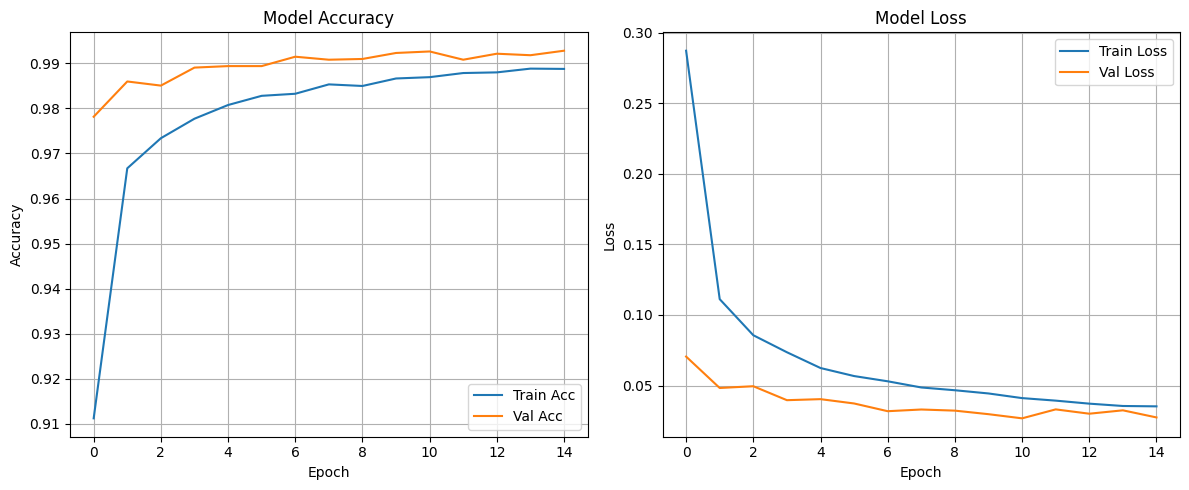

In [15]:
# Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
model.export("my_saved_model")  # This creates a SavedModel folder

Saved artifact at 'my_saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  135072832459728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135072832462608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135072832460304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135072832462800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135072832462992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135072832463760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135072832464336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135072832465872: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [24]:
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model my_saved_model tfjs_model/

2025-06-19 06:44:13.445341: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750315453.465137    6770 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750315453.471115    6770 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-06-19 06:44:17.425684: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1750315457.425852    6770 gpu_device.cc:2022] Created device /job:localhost/replica:0/task